A few imports

In [1]:
  %load_ext autoreload
  %autoreload 2
  %reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
  import os
  import sys

  sys.path.insert(0, '../')
  current_dir = os.path.dirname(os.path.abspath('__file__'))
  # Get parent directory (= the project root)
  project_root = os.path.join(current_dir, '..')
  # Append to system path
  sys.path.append(project_root)

  print("Python exe")
  print(sys.executable)


Python exe
/home/leon/mambaforge/envs/dual_data/bin/python


In [3]:
  import numpy as np
  import matplotlib
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd
  # from dual_data.common.plot_utils import plot_summary

  sns.set_context("poster")
  sns.set_style("ticks")
  plt.rc("axes.spines", top=False, right=False)
  fig_path = '../figs/perf'
  golden_ratio = (5**.5 - 1) / 2
  width = 6

  matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
  matplotlib.rcParams['lines.markersize'] = 6
  %matplotlib inline
  %config InlineBackend.figure_format = 'png'


Running a simulation

100

In [16]:
update_conf('../conf/config_EI', 'DATA_PATH', '../data/simul')

In [7]:
run_cpp()

0.9446125 3.4273872


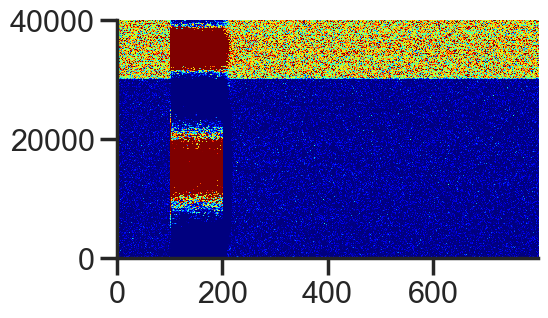

In [53]:
import numpy as np

# Open the file in binary mode and read the data
with open('../data/simul/rates.txt', 'rb') as f:
    data = np.fromfile(f, dtype=np.float32)

# Now 'data' is a numpy array containing your data
data = data.reshape(-1, 40000).T
plt.imshow(data, aspect='auto', vmin=0, vmax=5, cmap='jet')
plt.ylim([0, 40000])
print(np.mean(data[:30000]), np.mean(data[10000:]))


In [8]:
from run_model import run_cpp, update_conf

Running different initializations

In [5]:
for i in range(3):
    data_path = '../data/simul/init_%d' % i
    update_conf('../conf/config_EI', 'DATA_PATH', data_path)
    run_cpp()
    

Parameter search

In [40]:
print(Ie)

1.0


In [45]:
update_conf('../conf/config_EI', 'Iext', float(Ie), axis=0)


In [ ]:
from joblib import Parallel, delayed

def my_function(i):
    data_path = '../data/simul/Ie_%.2f_Jee_%.2f' % (Ie, Jee)
    update_conf('../conf/config_EI', 'DATA_PATH', data_path)
    update_conf('../conf/config_EI', 'Iext', float(Ie/1000.0), axis=0)
    update_conf('../conf/config_EI', 'Jab', float(Jee), axis=0)

Parallel(n_jobs=-1)(delayed(my_function)(i) for i in range(10))


In [9]:
Ie_list = np.linspace(1, 10, 10)
print('Ie', Ie_list)

Jee_list = np.linspace(1, 10, 10)
print('Jee', Jee_list)

for Ie in Ie_list:
    for Jee in Jee_list:
        # print('Ie', Ie, 'Jee', Jee)
        session = "Ie_%.2f_Jee_%.2f" % (Ie, Jee)
        data_path = '../data/simul/Ie_%.2f_Jee_%.2f' % (Ie, Jee)
        update_conf('../conf/config_EI', 'DATA_PATH', data_path)
        update_conf('../conf/config_EI', 'Iext', float(Ie/1000.0), axis=0)
        update_conf('../conf/config_EI', 'Jab', float(Jee), axis=0)

        run_cpp(session)
        
        

Ie [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Jee [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Ie 1.0 Jee 1.0
Ie 1.0 Jee 2.0
Ie 1.0 Jee 3.0
Ie 1.0 Jee 4.0
Ie 1.0 Jee 5.0


Ie 1.0 Jee 6.0
Ie 1.0 Jee 7.0
Ie 1.0 Jee 8.0
Ie 1.0 Jee 9.0
Ie 1.0 Jee 10.0


Ie 2.0 Jee 1.0
Ie 2.0 Jee 2.0
Ie 2.0 Jee 3.0
Ie 2.0 Jee 4.0
Ie 2.0 Jee 5.0


Ie 2.0 Jee 6.0
Ie 2.0 Jee 7.0
Ie 2.0 Jee 8.0
Ie 2.0 Jee 9.0
Ie 2.0 Jee 10.0


Ie 3.0 Jee 1.0
Ie 3.0 Jee 2.0
Ie 3.0 Jee 3.0
Ie 3.0 Jee 4.0
Ie 3.0 Jee 5.0


Ie 3.0 Jee 6.0
Ie 3.0 Jee 7.0
Ie 3.0 Jee 8.0
Ie 3.0 Jee 9.0
Ie 3.0 Jee 10.0


Ie 4.0 Jee 1.0
Ie 4.0 Jee 2.0
Ie 4.0 Jee 3.0
Ie 4.0 Jee 4.0
Ie 4.0 Jee 5.0


Ie 4.0 Jee 6.0
Ie 4.0 Jee 7.0
Ie 4.0 Jee 8.0
Ie 4.0 Jee 9.0
Ie 4.0 Jee 10.0


Ie 5.0 Jee 1.0
Ie 5.0 Jee 2.0
Ie 5.0 Jee 3.0
Ie 5.0 Jee 4.0
Ie 5.0 Jee 5.0


Ie 5.0 Jee 6.0
Ie 5.0 Jee 7.0
Ie 5.0 Jee 8.0
Ie 5.0 Jee 9.0
Ie 5.0 Jee 10.0


Ie 6.0 Jee 1.0
Ie 6.0 Jee 2.0
Ie 6.0 Jee 3.0
Ie 6.0 Jee 4.0
Ie 6.0 Jee 5.0


Ie 6.0 Jee 6.0
Ie 6.0 Jee 7.0
Ie 6.0 Jee 8.0
Ie 6.0 Jee 9.0
Ie 6.0 Jee 10.0


Ie 7.0 Jee 1.0
Ie 7.0 Jee 2.0
Ie 7.0 Jee 3.0
Ie 7.0 Jee 4.0
Ie 7.0 Jee 5.0


Ie 7.0 Jee 6.0
Ie 7.0 Jee 7.0
Ie 7.0 Jee 8.0
Ie 7.0 Jee 9.0
Ie 7.0 Jee 10.0


Ie 8.0 Jee 1.0
Ie 8.0 Jee 2.0
Ie 8.0 Jee 3.0
Ie 8.0 Jee 4.0


Ie 8.0 Jee 5.0
Ie 8.0 Jee 6.0
Ie 8.0 Jee 7.0
Ie 8.0 Jee 8.0


Ie 8.0 Jee 9.0
Ie 8.0 Jee 10.0
Ie 9.0 Jee 1.0
Ie 9.0 Jee 2.0


Ie 9.0 Jee 3.0
Ie 9.0 Jee 4.0
Ie 9.0 Jee 5.0
Ie 9.0 Jee 6.0


Ie 9.0 Jee 7.0
Ie 9.0 Jee 8.0
Ie 9.0 Jee 9.0
Ie 9.0 Jee 10.0


Ie 10.0 Jee 1.0
Ie 10.0 Jee 2.0
Ie 10.0 Jee 3.0
Ie 10.0 Jee 4.0


Ie 10.0 Jee 5.0
Ie 10.0 Jee 6.0
Ie 10.0 Jee 7.0
Ie 10.0 Jee 8.0


Ie 10.0 Jee 9.0
Ie 10.0 Jee 10.0
